In [12]:
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
import numpy as np
import scipy
from jax.config import config; config.update("jax_enable_x64", True)

from corner import corner, hist2d

import jaxopt

from tqdm import tqdm

import matplotlib.pyplot as plt

import pystroke

In [2]:
dims = 2
Nobs = 20

# Construct random posteriors
event_list = []
pdet = dist.Uniform(-3*jnp.ones(dims),3*jnp.ones(dims))

means = []
covs = []

for i in range(Nobs):
    key = jax.random.PRNGKey(i*5+1)
    
    cov = np.diag(np.random.uniform(0.01,0.5,size=dims))
    loc = np.random.randn(dims) + np.random.multivariate_normal(np.zeros(dims), cov)
    
    means.append(loc)
    covs.append(cov)
    
    dist_i = dist.MultivariateNormal(jnp.array(loc), jnp.array(cov))
    
    event_list.append(dist_i)

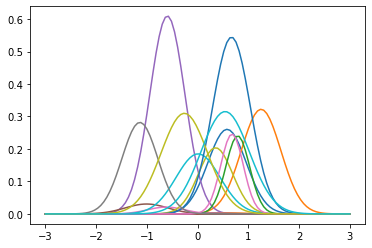

In [3]:
xs = np.linspace(-3,3,100)
ys = np.linspace(-3,3,100)
zs = np.zeros(100)

for i in range(Nobs):
    
    plt.plot(xs, np.exp(event_list[i].log_prob(jnp.array([xs,xs]).T)))
    
plt.show()

In [4]:
pistroke_test = pystroke.PiStroke(event_list, pdet)

In [5]:
pistroke_test.gradient_descent()

  0%|                                                                                                                                                                                                                                                                                                                     | 0/5 [00:00<?, ?it/s]

Random initialized position has logL -50.998605679940724
Minimized result has logL -27.17917103767892


 20%|████████████████████████████████████████████████████████████▏                                                                                                                                                                                                                                                | 1/5 [00:09<00:39,  9.84s/it]

Minimized and reduced result has logL -27.178942837204694
Random initialized position has logL -58.25030147720172
Minimized result has logL -27.71474637727446


 40%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                    | 2/5 [00:18<00:27,  9.03s/it]

Minimized and reduced result has logL -27.714001186430064
Random initialized position has logL -79.0115523058592
Minimized result has logL -28.083913125530415


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 3/5 [00:26<00:17,  8.84s/it]

Minimized and reduced result has logL -28.083493602533174
Random initialized position has logL -58.886083488630675
Minimized result has logL -27.178574531576537


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 4/5 [00:35<00:08,  8.67s/it]

Minimized and reduced result has logL -27.17852143503368
Random initialized position has logL -58.219002203782
Minimized result has logL -27.1921676172515


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:43<00:00,  8.75s/it]

Minimized and reduced result has logL -27.192166672903838

 Final logL -27.17852143503368


DeviceArray([[  0.94165952,   0.14254069,  -0.92481668],
             [ -1.68987838,   0.75359711,  -2.20224145],
             [ -0.61176621,   1.2405572 ,  -2.25580142],
             [  0.60078818,  -1.68537745,  -2.41985056],
             [ -1.67844571,  -0.52003238,  -2.44214048],
             [ -0.83331444,   2.25433509,  -2.612625  ],
             [  1.19569797,  -1.20171453,  -3.00352828],
             [ -0.29549029,  -0.65900491,  -2.60217007],
             [  0.2636874 ,   1.01134683,  -4.05981142],
             [ -1.68989247,   0.75371505,  -6.30106381],
             [  1.19227307,  -1.20006426,  -8.31752648],
             [  0.94142624,   0.13786768,  -8.41410529],
             [  0.90045932,  -0.37310996, -10.48980038]], dtype=float64)

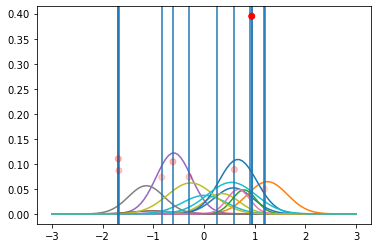

In [13]:
xs = np.linspace(-3,3,100)
ys = np.linspace(-3,3,100)
zs = np.zeros(100)

for i in range(Nobs):
    
    plt.plot(xs, np.exp(event_list[i].log_prob(jnp.array([xs]).T))/5)
    
plt.scatter(pistroke_test.result_array_gd[:,0], 
            np.exp(pistroke_test.result_array_gd[:,-1])/np.sum(np.exp(pistroke_test.result_array_gd[:,-1])),
            zorder=100, color='r', 
            alpha=np.exp(pistroke_test.result_array_gd[:,-1])/np.max(np.exp(pistroke_test.result_array_gd[:,-1])))

for i in range(len(pistroke_test.result_array_gd)):
    plt.axvline(pistroke_test.result_array_gd[i,0])

plt.show()

(-4.0, 4.0)

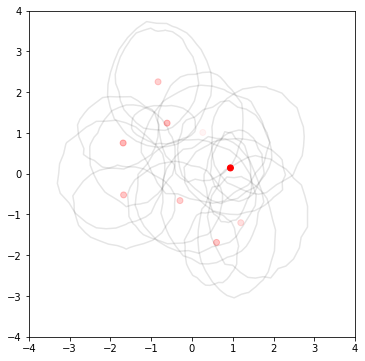

In [14]:
fig = plt.figure(figsize=[6,6])

for i in range(len(event_list)):
    samples = np.random.multivariate_normal(means[i], covs[i], size=10000)
    hist2d(samples[:,0], samples[:,1], new_fig=False, levels=[0.9], 
           smooth=0.5, plot_density=False, plot_datapoints=False, color='k', contour_kwargs={'alpha':0.1})

plt.scatter(pistroke_test.result_array_gd[:,0], pistroke_test.result_array_gd[:,1],zorder=100, color='r', 
            alpha=np.exp(pistroke_test.result_array_gd[:,-1])/np.max(np.exp(pistroke_test.result_array_gd[:,-1])))

ax = plt.gca()
ax.set_aspect('equal')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

In [15]:
print(len(pistroke_test.result_array_gd))

13
